<a href="https://colab.research.google.com/github/Naman1232/ML-PROJECTS/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION USING CNN








In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train) , (X_test,y_test)= datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

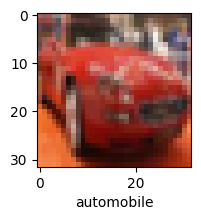

In [ ]:
plot_sample(X_train,y_train,5)

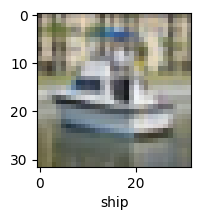

In [ ]:
plot_sample(X_train,y_train,501)

In [ ]:
X_train= X_train/255.0
X_test= X_test/255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.3053 - loss: 1.9331
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 92ms/step - accuracy: 0.4151 - loss: 1.6513
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.4506 - loss: 1.5577
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 85ms/step - accuracy: 0.4779 - loss: 1.4909
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 89ms/step - accuracy: 0.4942 - loss: 1.4424


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.56      0.50      0.53      1000
           1       0.69      0.50      0.58      1000
           2       0.34      0.36      0.35      1000
           3       0.36      0.31      0.33      1000
           4       0.34      0.55      0.42      1000
           5       0.41      0.37      0.39      1000
           6       0.49      0.60      0.54      1000
           7       0.70      0.39      0.50      1000
           8       0.49      0.72      0.59      1000
           9       0.64      0.44      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [ ]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

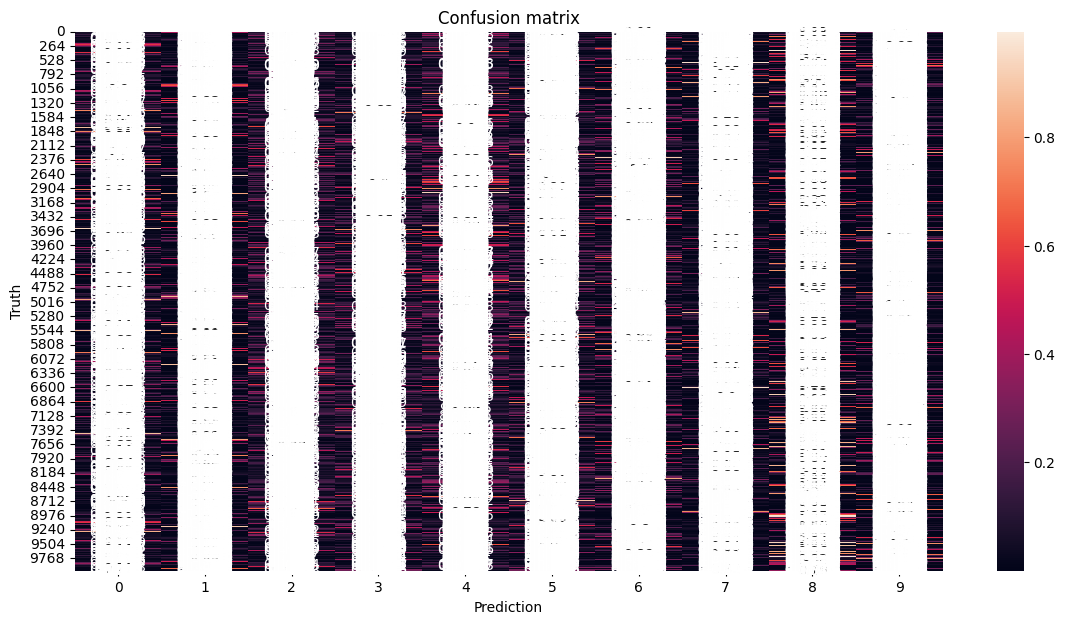

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3789 - loss: 1.6915
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.5925 - loss: 1.1544
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.6514 - loss: 0.9949
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6904 - loss: 0.8913
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7130 - loss: 0.8217
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7345 - loss: 0.7592
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7521 - loss: 0.7032
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7712 - loss: 0.6549
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7807 - loss: 0.6237
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 53ms/step - accuracy: 0.7984 - loss: 0.5731


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6987 - loss: 0.9222


[0.9381250143051147, 0.6949999928474426]

In [ ]:
y_pred= cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


array([[1.5448673e-05, 2.3418690e-06, 6.3483669e-05, 9.6309322e-01,
        4.6069261e-05, 3.6098160e-02, 6.5467099e-04, 2.6856806e-06,
        2.3886700e-05, 7.5619454e-08],
       [8.1813079e-04, 2.6325535e-02, 5.1285983e-06, 1.2304715e-06,
        1.7966350e-08, 2.7353538e-08, 1.6182796e-09, 4.1871728e-10,
        9.7281069e-01, 3.9196584e-05],
       [6.7157499e-02, 2.6075059e-01, 1.3891635e-02, 9.0262881e-03,
        9.4719669e-03, 1.6598164e-03, 1.6363804e-03, 2.9782760e-03,
        5.5764663e-01, 7.5780869e-02],
       [4.1295797e-01, 9.7692211e-04, 1.7571174e-02, 9.2017446e-03,
        8.1824455e-03, 4.6287751e-04, 1.8166654e-02, 8.1758894e-04,
        5.2917832e-01, 2.4842343e-03],
       [2.3597263e-08, 1.0399088e-05, 1.0432699e-02, 7.6995216e-02,
        3.0359685e-01, 6.6262712e-03, 6.0231620e-01, 8.4934436e-07,
        2.1447751e-05, 1.2574007e-07]], dtype=float32)

In [ ]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

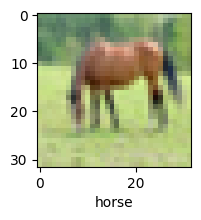

In [ ]:
plot_sample(X_test,y_test,60)

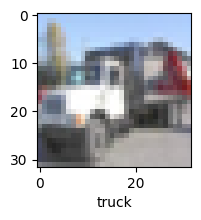

In [ ]:
plot_sample(X_test,y_test,45)

In [ ]:
classes[y_classes[45]]

'truck'